# Monday, December 9th, 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
student_df = pd.read_csv('students.csv')

In [3]:
student_df

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025
...,...,...,...,...,...,...,...
195,3274,Catherine Velasquez,22,fsutton@gmail.com,Physics,2.71,2025
196,3609,Joyce Thomas,19,zanderson@barrera.net,Chemistry,2.22,2030
197,9179,Theresa Hughes,21,mstanley@yahoo.com,Mathematics,3.23,2025
198,4463,Steven Golden,19,nvasquez@yahoo.com,Computer Science,3.90,2025


In [9]:
student_df['GPA'].median()

3.08

In [11]:
student_df['GPA'].max()

3.99

In [12]:
student_df['GPA'].min()

2.0

In [13]:
student_df['GPA'].mean()

3.0278500000000004

In [14]:
student_df['GPA'].mode()

0    2.02
1    2.14
2    2.51
3    3.16
Name: GPA, dtype: float64

We can use the `value_counts` method to count the number of occurences of values in some column.

In [17]:
student_df['GraduationYear'].value_counts()

GraduationYear
2030    37
2027    36
2025    30
2029    26
2028    25
2026    23
2024    23
Name: count, dtype: int64

Text(0, 0.5, 'Number of students')

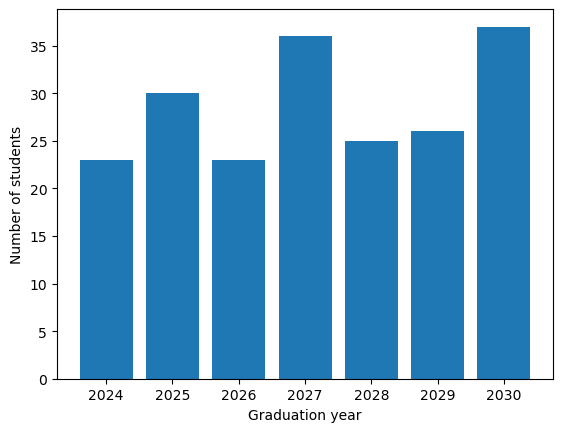

In [24]:
grad_year_counts = student_df['GraduationYear'].value_counts()

plt.bar(grad_year_counts.index, grad_year_counts.values)
plt.xlabel('Graduation year')
plt.ylabel('Number of students')

Suppose we want to calculate average GPAs separately for Math students, Chemistry, Physics, etc (by Department). We can use the `.groupby` method to create with a common value within a specified column:

In [28]:
GPA_by_department = student_df.groupby(by='Department')['GPA'].median()
GPA_by_department

Department
Biology             2.76
Chemistry           2.96
Computer Science    3.12
Mathematics         3.17
Physics             3.21
Name: GPA, dtype: float64

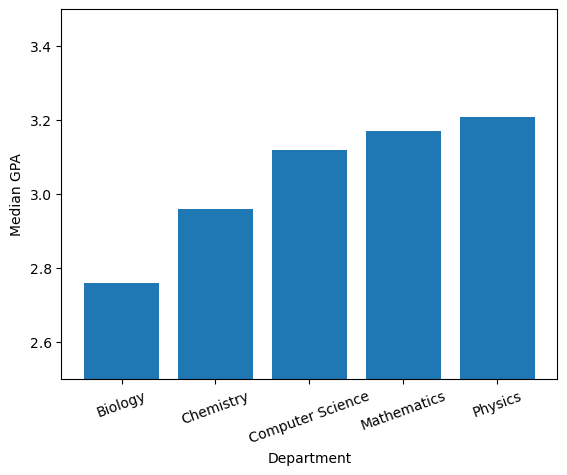

In [39]:
plt.bar(GPA_by_department.index, GPA_by_department.values)
plt.xlabel('Department')
plt.ylabel('Median GPA')

plt.ylim(2.5, 3.5)

plt.xticks(rotation=20);

Suppose we are also interested in finding the average age of each department:

In [42]:
student_df.groupby(by='Department')['Age'].mean()

Department
Biology             21.185185
Chemistry           21.521739
Computer Science    21.652174
Mathematics         21.666667
Physics             21.725490
Name: Age, dtype: float64

We can use the `.agg` method to simultaneously the mean age and median GPA for each department.

In [1]:
#help(student_df.groupby(by='Department').agg)

In [47]:
student_df.groupby(by='Department').agg({'Age':'mean', 'GPA':'median', 'GraduationYear':'median'})

,Age,GPA,GraduationYear
Department,,,
Biology,21.185185,2.76,2028.0
Chemistry,21.521739,2.96,2027.0
Computer Science,21.652174,3.12,2027.0
Mathematics,21.666667,3.17,2027.5
Physics,21.725490,3.21,2027.0


We can also define our own functions and apply them to data using the `.map` method:

In [48]:
def get_last_name(full_name):
    return full_name.split()[-1]

In [49]:
get_last_name('Jon Lottes')

'Lottes'

In [52]:
student_df['Name'].map(get_last_name)

0         Palmer
1          Roach
2       Gonzalez
3         Morrow
4       Martinez
         ...    
195    Velasquez
196       Thomas
197       Hughes
198       Golden
199        Smith
Name: Name, Length: 200, dtype: object

In [54]:
student_df['LastName'] = student_df['Name'].map(get_last_name)

In [55]:
student_df

,StudentID,Name,Age,Email,Department,GPA,GraduationYear,LastName
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026,Palmer
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027,Roach
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027,Gonzalez
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029,Morrow
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025,Martinez
...,...,...,...,...,...,...,...,...
195,3274,Catherine Velasquez,22,fsutton@gmail.com,Physics,2.71,2025,Velasquez
196,3609,Joyce Thomas,19,zanderson@barrera.net,Chemistry,2.22,2030,Thomas
197,9179,Theresa Hughes,21,mstanley@yahoo.com,Mathematics,3.23,2025,Hughes
198,4463,Steven Golden,19,nvasquez@yahoo.com,Computer Science,3.90,2025,Golden


## Working with multiple data sets:

In [56]:
price_df = pd.read_csv('price.csv')
primary_features_df = pd.read_csv('primary_features.csv')
fuel_df = pd.read_csv('fuel.csv')

The `.head()` method shows the first 5 rows of a dataframe:

In [59]:
price_df.head()

,app_id,price,price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price
0,108687133,16000.0,43595.0,True,47682.2500,42914.02500,76291.60000,25748.415000,91549.920000
1,108608289,13500.0,36783.0,True,40696.1192,36626.50728,65113.79072,21975.904368,78136.548864
2,106961361,134000.0,365110.0,False,186641.9500,NaN,NaN,NaN,NaN
3,107494885,16500.0,44957.0,True,79422.2803,71480.05227,127075.64848,42888.031362,152490.778176
4,108126733,32000.0,87190.0,True,98012.9084,88211.61756,156820.65344,52926.970536,188184.784128


In [60]:
primary_features_df.head()

,app_id,fuel_type_id,gear_type_id,drive_type,door_type,color_id,saloon_color_id,man_id,model_id,location_id,saloon_material
0,108687133,2,3,Front,4/5,8,16,24,549,2,Leather
1,108608289,2,3,Front,4/5,8,16,24,549,2,Leather
2,106961361,2,2,4x4,4/5,16,11,22,498,2,Leather
3,107494885,2,3,Rear,2/3,16,16,25,8621,2,Leather
4,108126733,3,2,4x4,>5,7,16,12,328,2,Leather


In [61]:
fuel_df.head()

,id,parent_id,fuel_type
0,2,0,Petrol
1,3,0,Diesel
2,7,0,Electric
3,11,0,Hybrid
4,6,11,Hybrid


Suppose we want to compare prices with fuel types. We need to bring this data together so it can be analyzed.

The `.merge` method is one way to combine dataframes.

In [71]:
help(price_df.merge)

Help on method merge in module pandas.core.frame:

merge(right: 'DataFrame | Series', how: 'MergeHow' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool | None' = None, indicator: 'str | bool' = False, validate: 'str | None' = None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    .. warning::
    
    

In [77]:
sales_df = price_df.merge(primary_features_df, on='app_id')
sales_df

,app_id,price,price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price,fuel_type_id,gear_type_id,drive_type,door_type,color_id,saloon_color_id,man_id,model_id,location_id,saloon_material
0,108687133,16000.0,43595.0,True,47682.2500,42914.02500,76291.60000,25748.415000,91549.920000,2,3,Front,4/5,8,16,24,549,2,Leather
1,108608289,13500.0,36783.0,True,40696.1192,36626.50728,65113.79072,21975.904368,78136.548864,2,3,Front,4/5,8,16,24,549,2,Leather
2,106961361,134000.0,365110.0,False,186641.9500,NaN,NaN,NaN,NaN,2,2,4x4,4/5,16,11,22,498,2,Leather
3,107494885,16500.0,44957.0,True,79422.2803,71480.05227,127075.64848,42888.031362,152490.778176,2,3,Rear,2/3,16,16,25,8621,2,Leather
4,108126733,32000.0,87190.0,True,98012.9084,88211.61756,156820.65344,52926.970536,188184.784128,3,2,4x4,>5,7,16,12,328,2,Leather
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122473,107264361,30.0,30.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,4x4,4/5,8,0,319,11602,2,Leather
122474,109401973,0.0,0.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,Rear,4/5,16,0,107,6394,2,Leather
122475,109588381,20.0,20.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,Rear,4/5,3,0,14,383,2,Leather
122476,109592729,120.0,120.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,4x4,4/5,16,0,14,383,2,Leather


We're almost ready, but it would be nice to have the fuel type listed rather than the numeric idea. This data we get from the `fuel.csv` file, or `fuel_df`.

In [72]:
fuel_df

,id,parent_id,fuel_type
0,2,0,Petrol
1,3,0,Diesel
2,7,0,Electric
3,11,0,Hybrid
4,6,11,Hybrid
5,10,11,Plug-in Hybrid
6,5,0,Gas/Petrol
7,9,5,LPG
8,8,5,CNG
9,12,0,Hydrogen


Let's convert `fuel_df` into something like a dictionary whose keys are `fuel_id`s and whose values are `fuel_type`s:

In [75]:
fuel_id_map = fuel_df.set_index('id')['fuel_type']
fuel_id_map

id
2             Petrol
3             Diesel
7           Electric
11            Hybrid
6             Hybrid
10    Plug-in Hybrid
5         Gas/Petrol
9                LPG
8                CNG
12          Hydrogen
0            Unknown
Name: fuel_type, dtype: object

The object above is a Pandas series, and is very similar to a dictionary, where the keys are the index entries. We can use this series object within the `.map` method:

In [82]:
sales_df['fuel_type'] = sales_df['fuel_type_id'].map(fuel_id_map)

In [83]:
sales_df

,app_id,price,price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price,fuel_type_id,gear_type_id,drive_type,door_type,color_id,saloon_color_id,man_id,model_id,location_id,saloon_material,fuel_type
0,108687133,16000.0,43595.0,True,47682.2500,42914.02500,76291.60000,25748.415000,91549.920000,2,3,Front,4/5,8,16,24,549,2,Leather,Petrol
1,108608289,13500.0,36783.0,True,40696.1192,36626.50728,65113.79072,21975.904368,78136.548864,2,3,Front,4/5,8,16,24,549,2,Leather,Petrol
2,106961361,134000.0,365110.0,False,186641.9500,NaN,NaN,NaN,NaN,2,2,4x4,4/5,16,11,22,498,2,Leather,Petrol
3,107494885,16500.0,44957.0,True,79422.2803,71480.05227,127075.64848,42888.031362,152490.778176,2,3,Rear,2/3,16,16,25,8621,2,Leather,Petrol
4,108126733,32000.0,87190.0,True,98012.9084,88211.61756,156820.65344,52926.970536,188184.784128,3,2,4x4,>5,7,16,12,328,2,Leather,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122473,107264361,30.0,30.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,4x4,4/5,8,0,319,11602,2,Leather,Petrol
122474,109401973,0.0,0.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,Rear,4/5,16,0,107,6394,2,Leather,Petrol
122475,109588381,20.0,20.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,Rear,4/5,3,0,14,383,2,Leather,Petrol
122476,109592729,120.0,120.0,False,0.0000,NaN,NaN,NaN,NaN,2,2,4x4,4/5,16,0,14,383,2,Leather,Petrol


In [86]:
fuel_vs_price_data = sales_df.groupby('fuel_type')['price'].mean().sort_values()
fuel_vs_price_data

fuel_type
Unknown              12.683529
Gas/Petrol         3453.000000
CNG                3810.253119
LPG                5309.752427
Petrol             5820.033979
Hydrogen           7358.620690
Hybrid             7724.366311
Diesel            10547.930844
Electric          11495.103692
Plug-in Hybrid    13188.545732
Name: price, dtype: float64

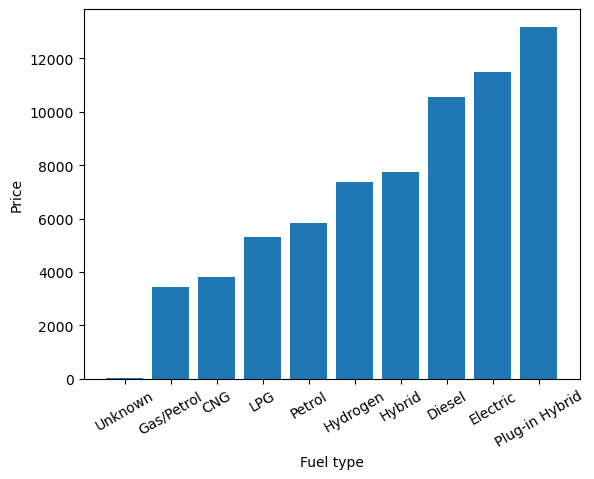

In [89]:
plt.bar(fuel_vs_price_data.index, fuel_vs_price_data.values)
plt.xlabel('Fuel type')
plt.ylabel('Price')

plt.xticks(rotation=30);